## Spotify Project - Data & EDA
This notebook is to clean the data and complete EDA.

In [2]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. Read in the data set from Kaggle. (https://www.kaggle.com/mrmorj/dataset-of-songs-in-spotify)

In [4]:
df = pd.read_csv('./data/genres_v2.csv')
df.head()

C:\Users\Bermonster\anaconda3\envs\Capstone\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


2. Check for null values and drop columns.

In [6]:
df.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [7]:
df.shape

(42305, 22)

The columns Unnamed: 0, title, and song_name are made of half null values. Therefore these columns are being dropped
from the dataframe.

In [ ]:
df.drop(columns= ['Unnamed: 0', 'title', 'song_name'], inplace=True)

3. Check data types and correct any issues within dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

### EDA


1. Check value distributions of object type columns.

>Column: type

In [13]:
df.type.value_counts()

#all data has the same type so I am dropping this column.
df.drop(columns='type', inplace=True)

audio_features    42305
Name: type, dtype: int64

> Column: id

In [14]:
df.id.value_counts()

7D5qMGajdfznFcXFArk5VE    9
5cRDn5aGMLvWsldoRmOOz0    8
3BSuC9Y6MhalaLlhyNbTYZ    8
5lXY6PTuWXOludKy4zDQwM    8
71NOmiKvk7s5R7dUurNjuy    7
                         ..
4AH8GJVosfrbfhe5NVTAnx    1
2ByzQkzLwhXeUPgpFAuVHu    1
1E6dCLM7YtLr1yVDouA7kO    1
0ifIudDeWelhhKzNqP12jm    1
050eFzayNkZrY2peMrUskK    1
Name: id, Length: 35877, dtype: int64

These are string ids for the songs in the dataset.  These values should be dropped as there are too many unique values
that will make the model over fit.

In [ ]:
df.drop(columns='id', inplace= True)

> Column: uri

In [15]:
df.uri.value_counts()

spotify:track:7D5qMGajdfznFcXFArk5VE    9
spotify:track:5lXY6PTuWXOludKy4zDQwM    8
spotify:track:3BSuC9Y6MhalaLlhyNbTYZ    8
spotify:track:5cRDn5aGMLvWsldoRmOOz0    8
spotify:track:7CN6ZYIX338ekn7pb2CpQp    7
                                       ..
spotify:track:79Y2fQStWYfe04RhcMZBU2    1
spotify:track:1cwT73fXUjQXmxNrTKDuM3    1
spotify:track:6bCUc6qaw54tyqLrQG9gE7    1
spotify:track:2kM3gIkHRiikiaIUFk3Fje    1
spotify:track:45KsTd0ZqKlgw0fNc8oyC5    1
Name: uri, Length: 35877, dtype: int64

This column contains similar data as in the id column.  This coulmn should be dropped as well to prevent creating too
many features when dummying the columns.

In [16]:
df.drop(columns='uri', inplace= True)

> Column: track_href

track_href is the url for the specific track. This column will not make give good data fro the model and will be dropped.

In [17]:
df.drop(columns='track_href', inplace= True)

0        https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...
1        https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...
2        https://api.spotify.com/v1/tracks/0vSWgAlfpye0...
3        https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...
4        https://api.spotify.com/v1/tracks/4jCeguq9rMTl...
                               ...                        
42300    https://api.spotify.com/v1/tracks/46bXU7Sgj710...
42301    https://api.spotify.com/v1/tracks/0he2ViGMUO3a...
42302    https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...
42303    https://api.spotify.com/v1/tracks/6HXgExFVuE1c...
42304    https://api.spotify.com/v1/tracks/6MAAMZImxcvY...
Name: track_href, Length: 42305, dtype: object

> Column: analysis_url

In [18]:
df.analysis_url.value_counts()

https://api.spotify.com/v1/audio-analysis/7D5qMGajdfznFcXFArk5VE    9
https://api.spotify.com/v1/audio-analysis/5lXY6PTuWXOludKy4zDQwM    8
https://api.spotify.com/v1/audio-analysis/3BSuC9Y6MhalaLlhyNbTYZ    8
https://api.spotify.com/v1/audio-analysis/5cRDn5aGMLvWsldoRmOOz0    8
https://api.spotify.com/v1/audio-analysis/2KVv2zAjDHxymySY5EIaAz    7
                                                                   ..
https://api.spotify.com/v1/audio-analysis/31RPJ5Fp0lDcBdj7cqcANc    1
https://api.spotify.com/v1/audio-analysis/2RfT1lgI87TDqWFM10dBVa    1
https://api.spotify.com/v1/audio-analysis/5APtjCmZ4YGTVGTXr0JaaP    1
https://api.spotify.com/v1/audio-analysis/7d15bDw2yme0mvwxq3tLLb    1
https://api.spotify.com/v1/audio-analysis/7ilEP6shKFOuX2O1OgXnm4    1
Name: analysis_url, Length: 35877, dtype: int64

This column contains similar data as in the track_href column.  This column should be dropped as well to prevent creating too
many features when dummying the columns.

In [ ]:
df.drop(columns='analysis_url', inplace=True)



Text(0.5, 1.0, 'Number of Songs for the Top 20 Song Types.')

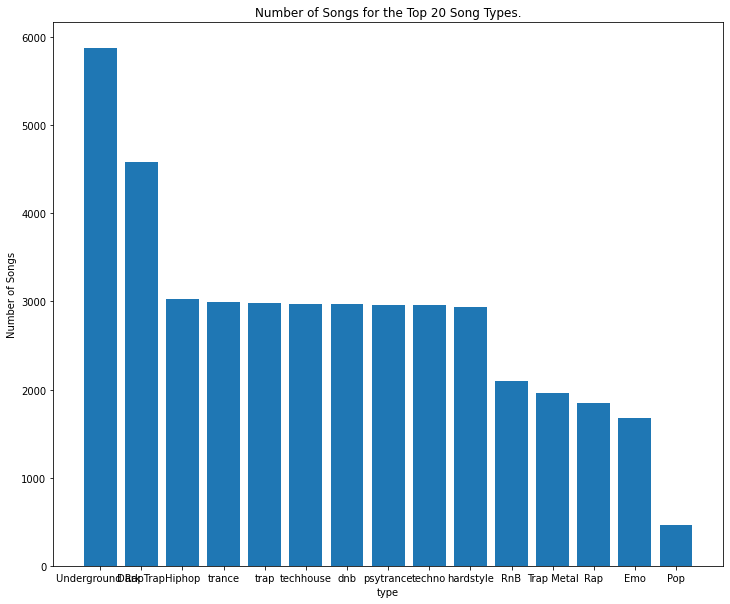

In [22]:
plt.figure(figsize=(12,10))
plt.bar(height=df['genre'].value_counts()[:20], x = df['genre'].value_counts().index[:20])
plt.xlabel('type')
plt.ylabel('Number of Songs')
plt.title('Number of Songs for the Top 20 Genres.')